In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [459]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [460]:
# переимуем столбцы
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']  

In [461]:
# удаляем колонку с отрицательными значениями
stud.drop(['studytime, granular'], inplace = True, axis = 1)
stud.head(10)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [462]:
# заменяем все пропущеные значения 'nan' на "None"    
for col in stud:
    stud[col] = stud[col].apply(lambda x: None if 'nan' in str(x) else x)
stud.head(10)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [463]:
# Если в столбце 'famesize' стоит GT3, а в столбце 'pstatus' при этом был "None", то меняем "None" на значение "Т"
stud.loc[((stud['pstatus'].isnull()) & (stud['famsize'] == 'GT3')), 'pstatus'] = 'T'
pd.DataFrame(stud.pstatus.value_counts())

,pstatus
T,342
A,36


In [464]:
# исправим ошибочное значение
stud.loc[(stud['fedu'] == 40), 'fedu'] = 4
pd.DataFrame(stud.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [465]:
# исправляем ошибку
stud.loc[(stud['famrel'] == -1.0), 'famrel'] = 1.0
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


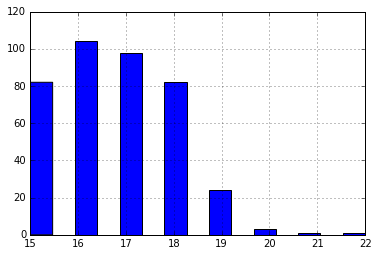

In [466]:
# Есть два выброса 21 и 22 года. Но мы от них избавляться не будем, 
#чтобы в конце посмотреть как увеличение возраста влияет на успеваемость
stud.age.hist(bins = 15)
stud.age.describe()

pd.DataFrame(stud.age.value_counts())

,school
GP,349
MS,46


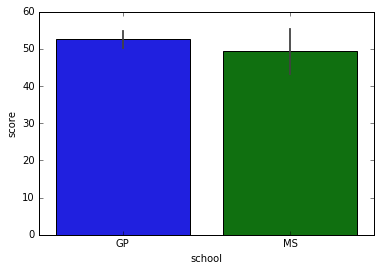

In [467]:
# Влияет ли выбор школы на успеваемость
sns.barplot(x = 'school', y = 'score', data = stud)
pd.DataFrame(stud.school.value_counts())

,address
U,295
R,83


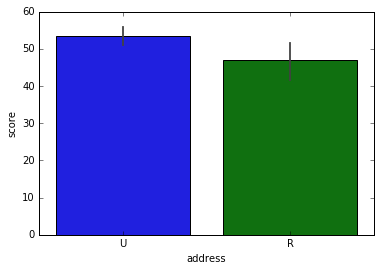

In [468]:
# Влият ли на успеваемость живёт ученик в городе и за городом
sns.barplot(x = 'address', y = 'score', data = stud)
pd.DataFrame(stud.address.value_counts())

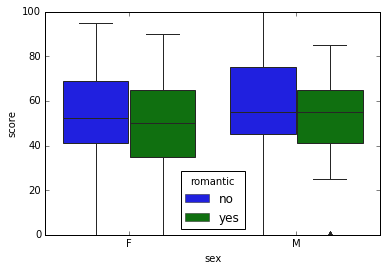

In [469]:
# Влияет ли на успеваемость пол учащегося и наличие романтических отношений
sns.boxplot(x = 'sex', y = 'score', data = stud, hue = 'romantic')

,famsize
GT3,261
LE3,107


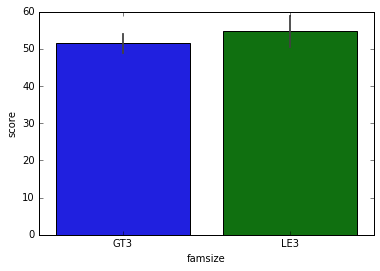

In [470]:
# Имеет ли значение для успеваемости по матекматике размер семьи учащегося
sns.barplot(x = 'famsize', y = 'score', data = stud)
pd.DataFrame(stud.famsize.value_counts())

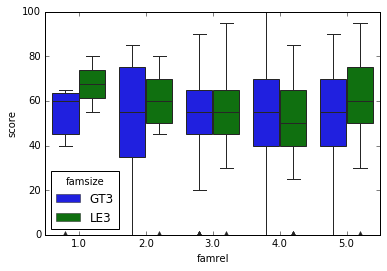

In [471]:
# Посмотрим влияет ли отношения в семьях 'GT3' и 'LT3' на итоговую оценку по матекматике
sns.boxplot(x = 'famrel', y = 'score', data = stud, hue = 'famsize')

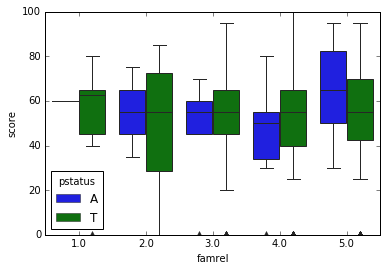

In [472]:
# Как влияет на успеваемость отношения в семье если родители живут вместе или раздельно
sns.boxplot(x = 'famrel', y = 'score', data = stud, hue = 'pstatus')

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


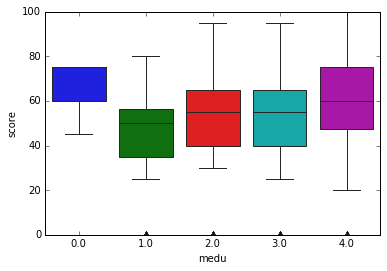

In [473]:
# Имеет ли значение образование отца на успеваемость ученика по математике
sns.boxplot(x = 'medu', y = 'score', data = stud)
pd.DataFrame(stud.medu.value_counts())
#stud.medu.describe()

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


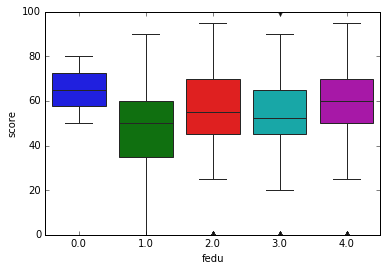

In [474]:
# Имеет ли значение образование матери на успеваемость ученика по математике
sns.boxplot(x = 'fedu', y = 'score', data = stud)
pd.DataFrame(stud.fedu.value_counts())

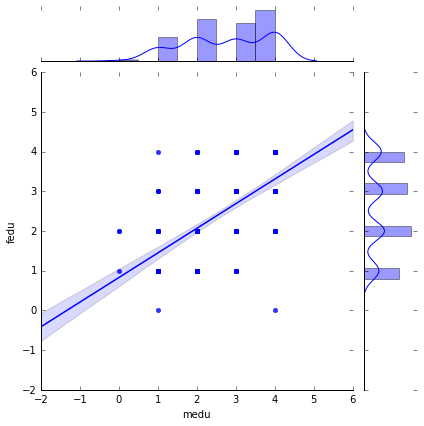

In [475]:
# Посмотрим на связь между образованием отца и матери
sns.jointplot(x = 'medu', y = 'fedu', data = stud, kind = 'reg')

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


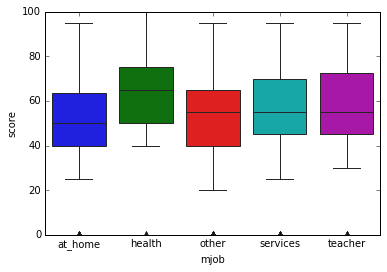

In [476]:
# Влияет ли наличие работы у отца, и какой именно, на успеваемость ученика
sns.boxplot(x = 'mjob', y = 'score', data = stud)
pd.DataFrame(stud.mjob.value_counts())

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


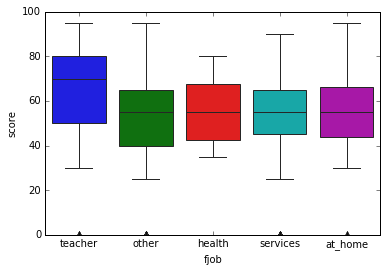

In [477]:
# Влияет ли наличие работы у матери на успеваемость учащегося
sns.boxplot(x = 'fjob', y = 'score', data = stud)
pd.DataFrame(stud.fjob.value_counts())

In [484]:
pd.DataFrame(stud.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

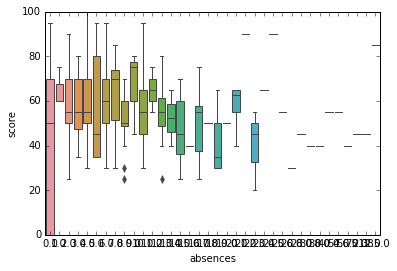

In [485]:
sns.boxplot(x = 'absences', y = 'score', data = stud)
stud.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


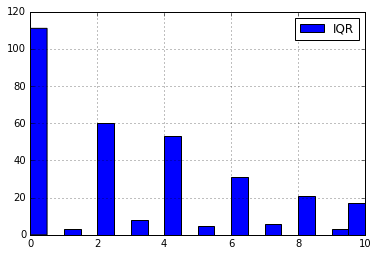

In [494]:
# Избавляемся от выбросов с помощью метода межкватрильного размаха
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 10), label = 'IQR')
 
plt.legend();

In [495]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [486]:
pd.DataFrame(stud.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

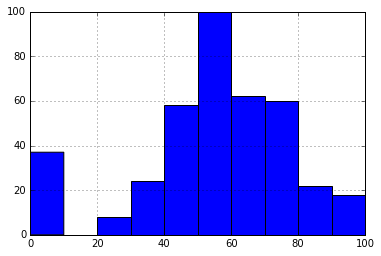

In [487]:
stud.score.hist()
stud.score.describe()

In [376]:
# В главной для нас графе 'score' есть выбросы только в одну сторону. 
# О чём это может говорить: что данные заполнялись корректно, 
# а ученики получивших "0" баллов просто по каким-то причинам не писали этот экзамен.
# Если мы оставим данные как они есть, то с ними будут плохо коррелировать остальные переменные,
# 

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


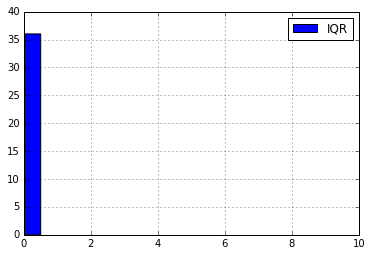

In [503]:
# Также избавляемся от выбросов
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 10), label = 'IQR')
 
plt.legend();

In [504]:
stud = stud.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [331]:
# Выясним, какие столбцы коррелируют с итоговым боллом по математике 'score'. 
#Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.
## Корреляции рассмотрим только для числовых столбцов. Корреляционный анализ

sns.pairplot(stud, kind = 'reg')

In [507]:
# Используем матрицу корреляции
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164627,-0.170310,0.072970,0.000417,0.179170,0.053881,0.043196,0.127582,-0.064051,0.155469,-0.159306
medu,-0.164627,1.000000,0.625902,-0.189973,0.087904,-0.240567,-0.012270,0.041438,0.058623,-0.055584,0.066439,0.210257
fedu,-0.170310,0.625902,1.000000,-0.132867,0.009432,-0.284939,-0.020295,-0.012527,0.040273,0.019340,-0.024235,0.113379
traveltime,0.072970,-0.189973,-0.132867,1.000000,-0.097291,0.064499,-0.036739,-0.012274,0.022589,0.001935,-0.050613,-0.074045
studytime,0.000417,0.087904,0.009432,-0.097291,1.000000,-0.176952,0.030359,-0.139698,-0.036747,-0.089648,-0.075454,0.113113
failures,0.179170,-0.240567,-0.284939,0.064499,-0.176952,1.000000,-0.002008,0.088810,0.080343,0.099425,0.076537,-0.329542
famrel,0.053881,-0.012270,-0.020295,-0.036739,0.030359,-0.002008,1.000000,0.174062,0.087324,0.083251,-0.092902,0.061516
freetime,0.043196,0.041438,-0.012527,-0.012274,-0.139698,0.088810,0.174062,1.000000,0.286959,0.040573,0.096281,0.034952
goout,0.127582,0.058623,0.040273,0.022589,-0.036747,0.080343,0.087324,0.286959,1.000000,0.005389,0.113048,-0.122246
health,-0.064051,-0.055584,0.019340,0.001935,-0.089648,0.099425,0.083251,0.040573,0.005389,1.000000,-0.013156,-0.057202


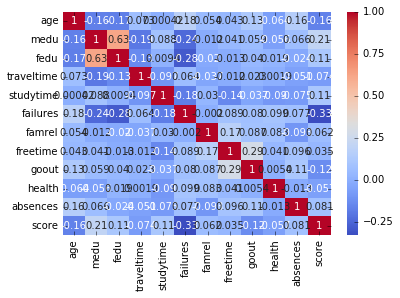

In [508]:
# Воспльзуемся тепловой картой
correlation = stud.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [ ]:
# Переменные 'medu' и 'fedu', а также 'freetime' и 'goout' скоррелировались между собой одинаково, 
# поэтому оставим по одной из них.
## Оставим эти переменные: 'medu','famrel', 'studytime', 'freetime', 'absences'

In [509]:
# Рассмотрим корреляцию для строчных столбцов. Анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

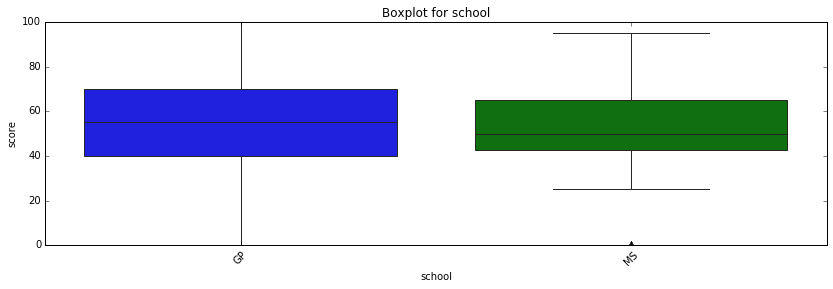

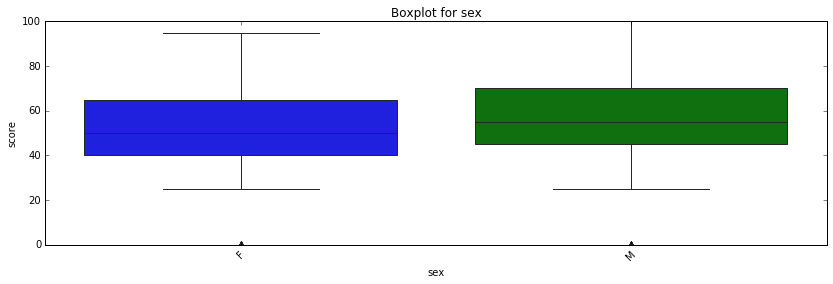

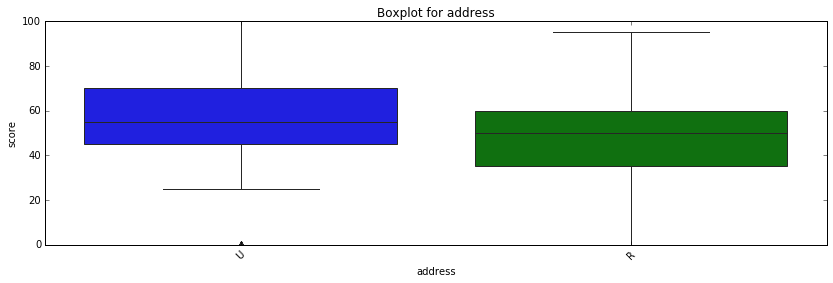

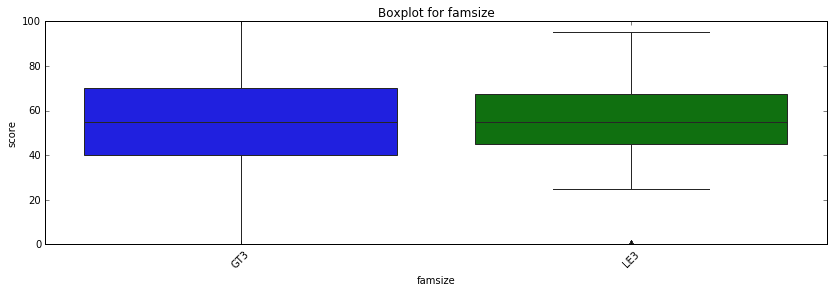

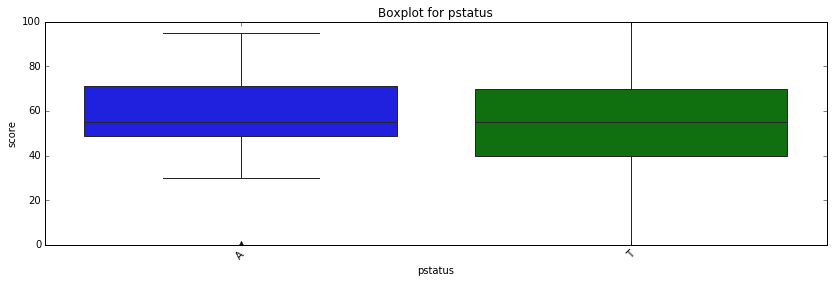

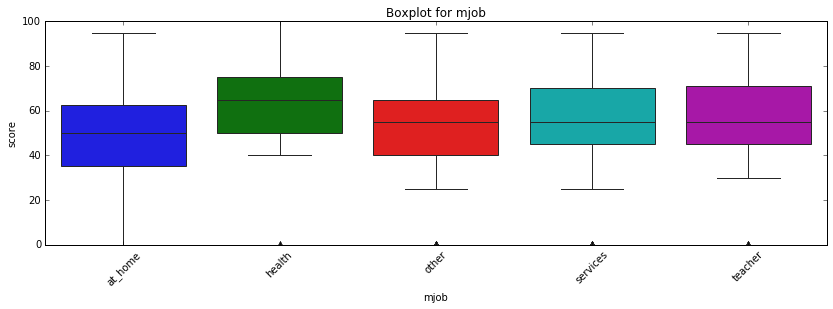

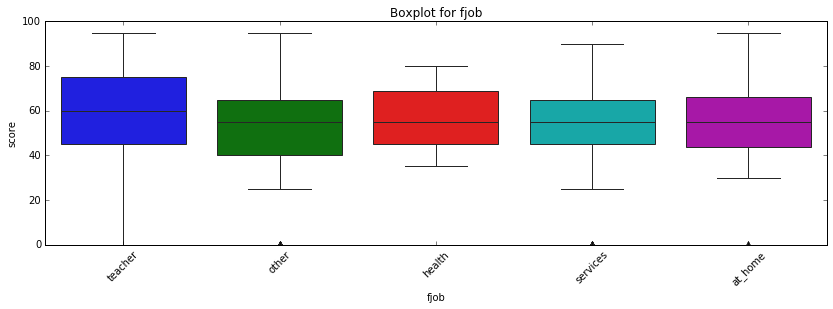

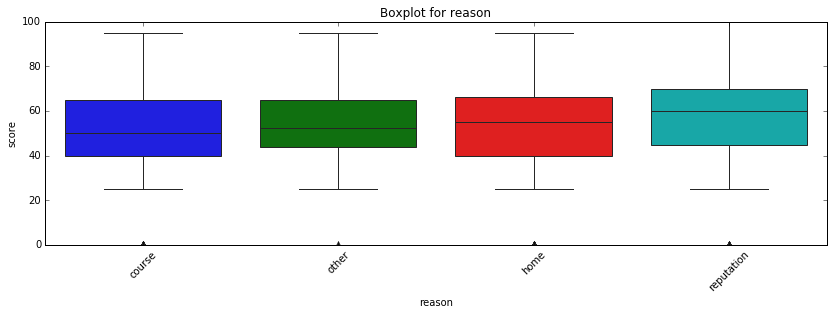

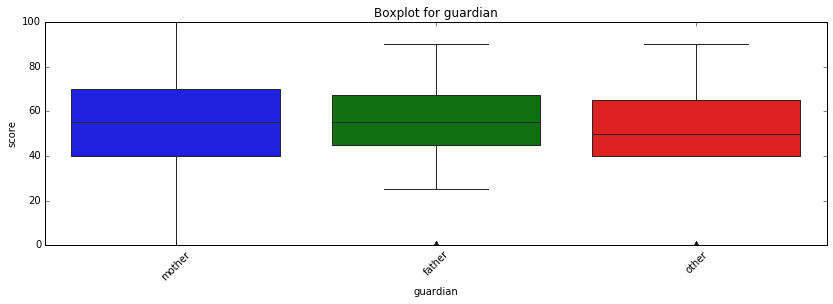

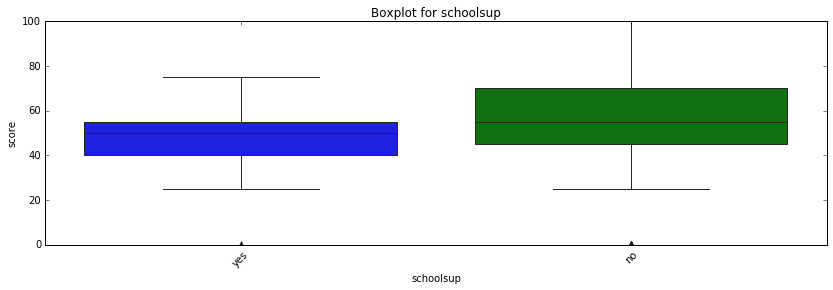

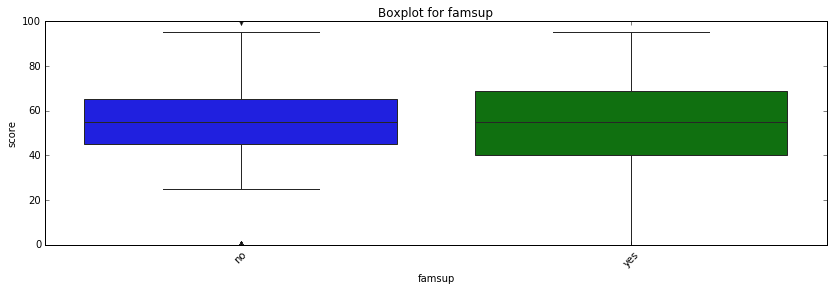

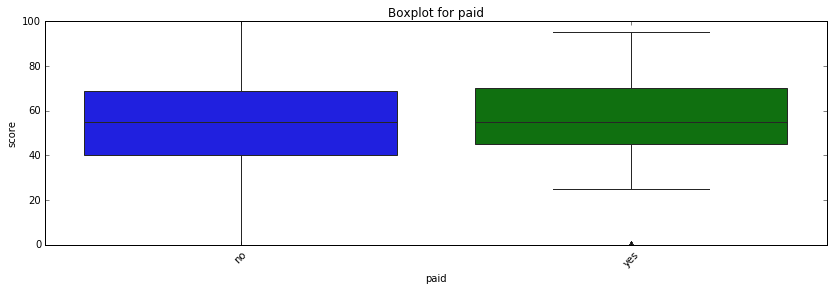

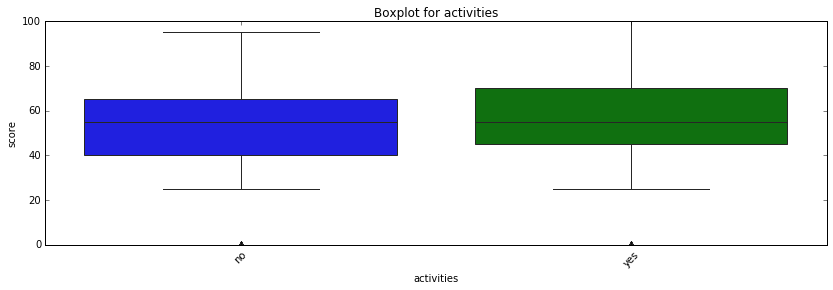

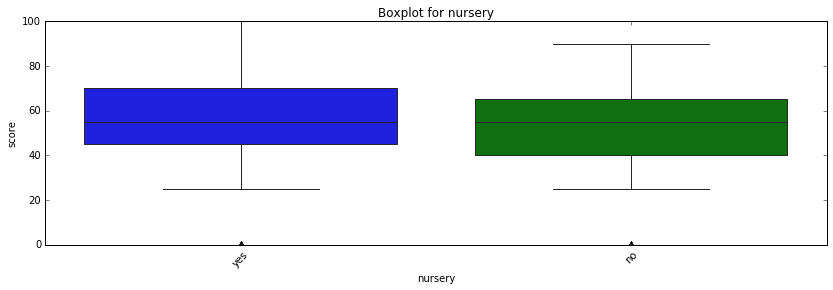

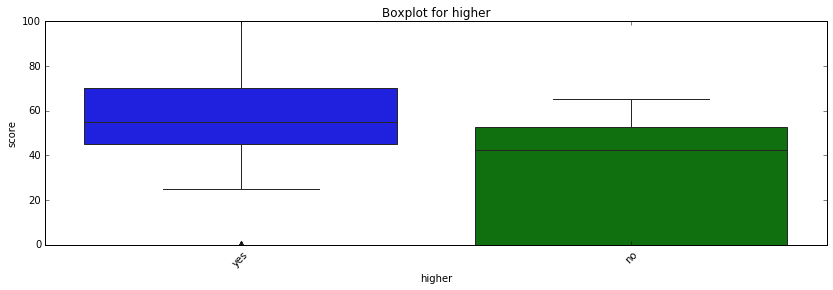

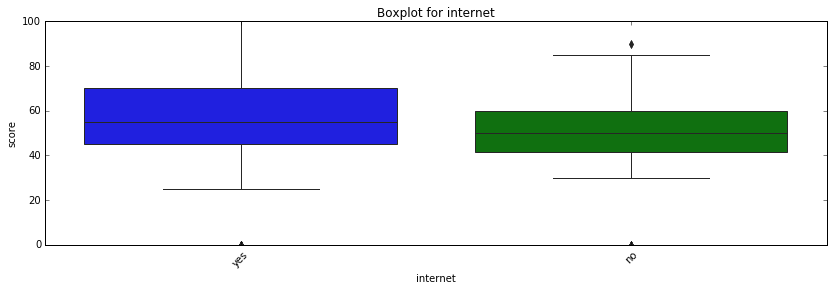

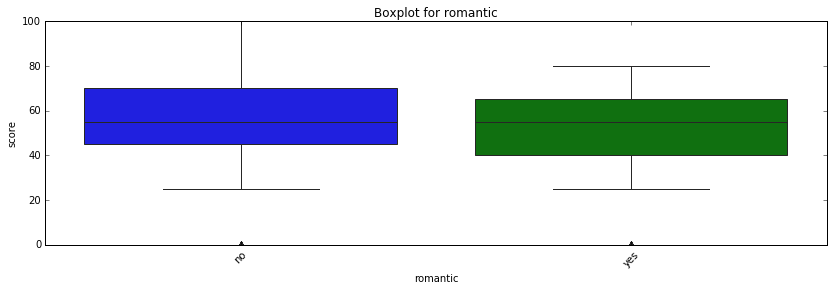

In [510]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [511]:
# Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [512]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [501]:
#  Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку по математике, это:
stud_for_model = stud.loc[:, ['sex', 'address', 'mjob', 'paid', 'higher', 'romantic',
                              'medu', 'famrel', 'studytime', 'freetime', 'absences']]
stud_for_model.head()

,sex,address,mjob,paid,higher,romantic,medu,famrel,studytime,freetime,absences
0,F,U,at_home,no,yes,no,4.0,4.0,2.0,3.0,6.0
1,F,U,at_home,no,yes,no,1.0,5.0,2.0,3.0,4.0
2,F,U,at_home,None,yes,None,1.0,4.0,2.0,3.0,10.0
3,F,U,health,yes,yes,yes,4.0,3.0,3.0,2.0,2.0
4,F,U,other,yes,yes,no,3.0,4.0,2.0,3.0,4.0
